In [1]:
import matplotlib.image as mpimg
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Extracting the compressed dataset.
from zipfile import ZipFile
data_path = '/content/drive/MyDrive/traffic zip/traffic_signs.zip'
with ZipFile(data_path, 'r') as zip:
    zip.extractall()


In [3]:
# path to the folder containing our dataset
dataset = '../content/traffic_Data/DATA'

# path of label file
labelfile = pd.read_csv('labels.csv')

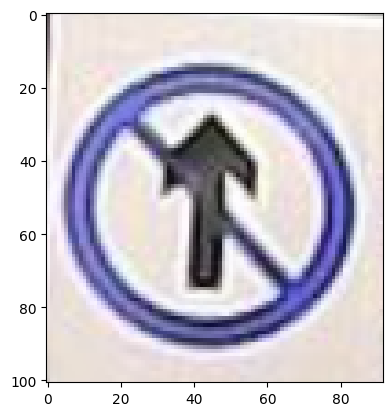

In [4]:
# Visualize some images from the dataset
img = cv2.imread("/content/traffic_Data/DATA/10/010_0011.png")
plt.imshow(img)

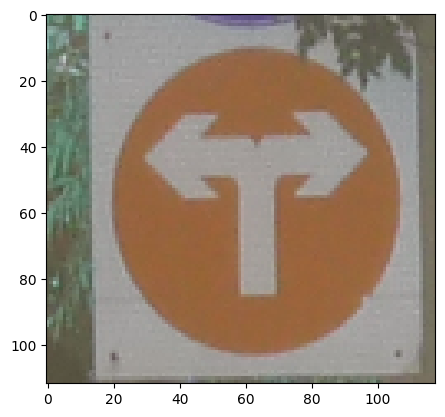

In [5]:
img = cv2.imread("/content/traffic_Data/DATA/23/023_0001.png")
plt.imshow(img)

In [6]:
labelfile.head()


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [7]:
labelfile.tail()


,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


**Model Training**

In [8]:
# Split the dataset into train and test set. Train set will be used
# to train our model and val set will be used to evaluate the performance of our model

train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset='training',
                                                               image_size=(
                                                                   224, 224),
                                                               seed=123,
                                                               batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                             subset='validation',
                                                             image_size=(
                                                                 224, 224),
                                                             seed=123,
                                                             batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [9]:
##create a list of class names
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
    class_names.append(labelfile['Name'][int(i)])

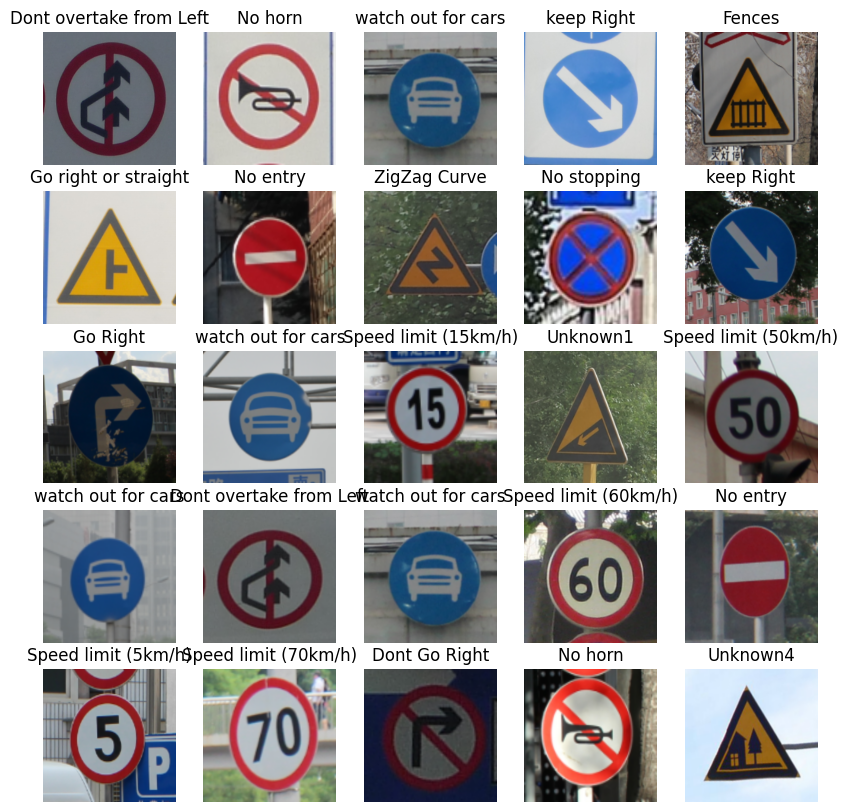

In [10]:
# visualize the train dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [11]:
## Data Augmentation
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal", input_shape=(224, 224, 3)),  # Horizontal flip
    RandomRotation(0.1),  # Random rotation by up to 10%
    RandomZoom(0.2),  # Random zoom by up to 20%
    RandomFlip("horizontal_and_vertical")  # Horizontal and vertical flip
])


In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.models import Sequential

# Define the expanded model
model = Sequential([
    Rescaling(1./255, input_shape=(224, 224, 3)),  # Input normalization

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(len(labelfile), activation='softmax')  # Output layer based on the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,821,562 (10.76 MB)

 Trainable params: 2,821,562 (10.76 MB)

 Non-trainable params: 0 (0.00 B)

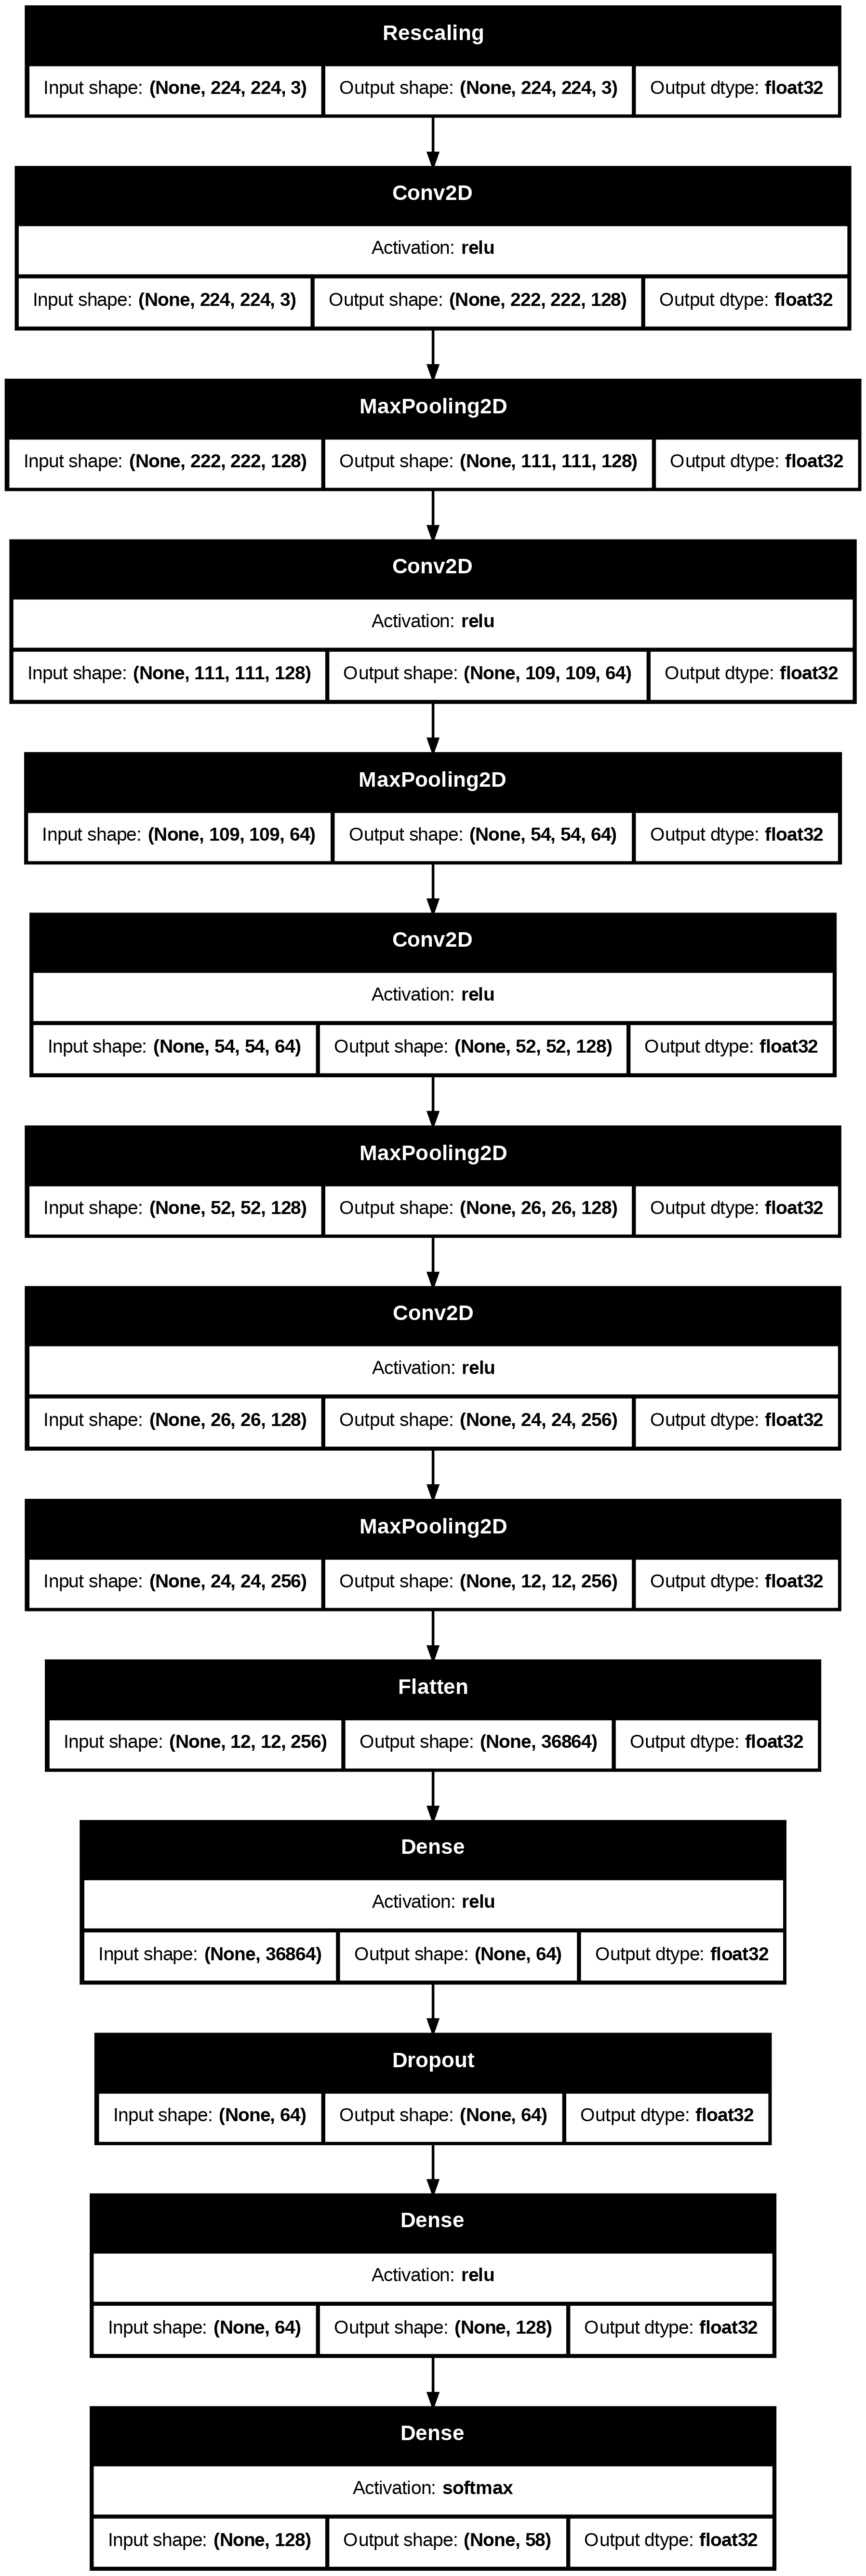

In [13]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [15]:
  #  Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
history = model.fit(train_ds,
                 validation_data=val_ds,
                 epochs=50,
                 callbacks=mycallbacks)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 33s 211ms/step - accuracy: 0.1403 - loss: 3.5250 - val_accuracy: 0.4556 - val_loss: 1.9923
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - accuracy: 0.4711 - loss: 1.9487 - val_accuracy: 0.6751 - val_loss: 1.1427
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.6030 - loss: 1.3428 - val_accuracy: 0.7638 - val_loss: 0.8059
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.7002 - loss: 0.9445 - val_accuracy: 0.8369 - val_loss: 0.5731
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.7638 - loss: 0.7939 - val_accuracy: 0.8297 - val_loss: 0.5319
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.7894 - loss: 0.6577 - val_accuracy: 0.8885 - val_loss: 0.3691
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.8194 - loss: 0.5827 - val_accuracy: 0.9113 - val_loss: 0.2882
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.8437 - loss: 0

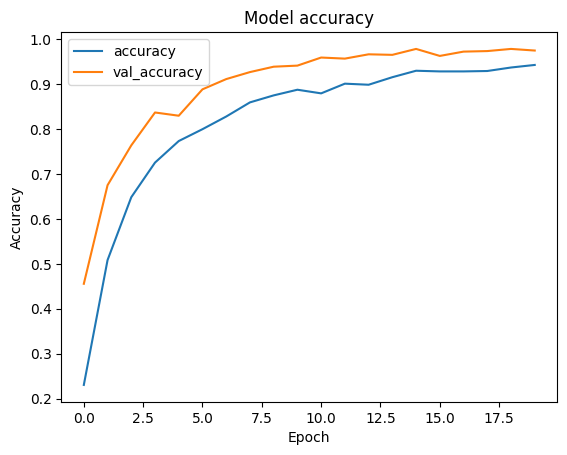

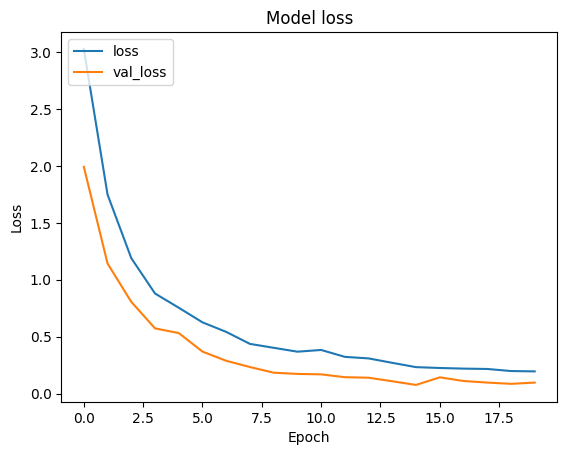

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [22]:
model.save('drive/MyDrive/Traffic-signs-model.h5')

In [21]:
model.save("Traffic-signs-model.h5")